In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
# 載入cufflinks並設定離線模式
import cufflinks as cf
cf.go_offline()
# 載入plotly.graph_objs
import plotly.graph_objs as go

In [2]:
data=pd.read_csv('00690.csv')
data.set_index(pd.to_datetime(data['Date']),inplace=True)
# data.set_index(pd.to_datetime(data['Date'],format='%Y/%m/%d'),inplace=True)
data.drop('Date',axis=1,inplace=True)
data.head()

,Price
Date,
2017-03-31,19.91
2017-04-05,19.95
2017-04-06,19.93
2017-04-07,19.84
2017-04-10,19.80


# 乖離率 (英文：Bias Ratio, BIAS)
## $$Bias=\frac{P-MA}{MA}$$
[乖離率(BIAS)的交易策略解析](https://www.oanda.com/bvi-ft/lab-education/technical_analysis/bias/)
![乖離率圖片](https://storage.googleapis.com/oanda-prod-oj-tw-wordpress/2022/01/0127001.png)

In [3]:
df1=data.copy()

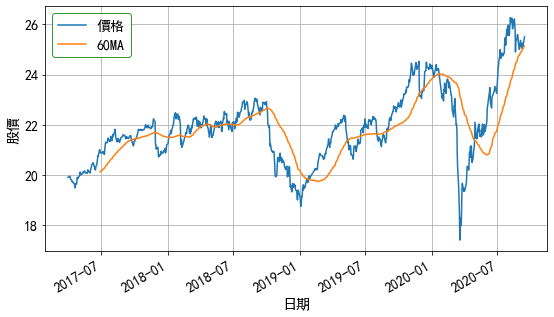

In [4]:
MA=60   #改變不同值可以得到不同條均線

df1['%d日均線' % MA]=df1['Price'].rolling(MA).mean()
plt.rcParams['font.size'] = '14'           # Set general font size
df1.plot(xlabel='日期',ylabel='股價',grid=True,figsize=(9,5))
plt.legend(['價格','%dMA' % MA],edgecolor='green', fontsize=14);

In [5]:
MA=60
Threshold=-0.1
hold_period=40

In [6]:
df=data.copy()
df['MA']=df['Price'].rolling(MA).mean()

In [7]:
df['Bias']=df['Price']/df['MA']-1
df['temp']=df['Price'].pct_change(hold_period)
df['return']=list(df['temp'].dropna())+[None]*(len(df)-len(df['temp'].dropna()))
df.dropna(inplace=True)

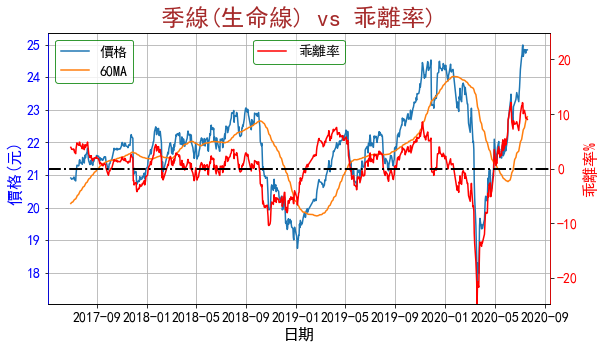

In [8]:
# 我們先製作出第一個subplot，然後把圖表的標題、X軸都設定好，再複製出第二個subplot
fig, ax1 = plt.subplots(figsize=(9,5))     # 我們先製作出第一個subplot
plt.rcParams['font.size'] = '14'           # Set general font size
plt.title('季線(生命線) vs 乖離率)', color='brown', fontsize=24)   # 圖表的標題
plt.xlabel('日期', fontsize=16)
ax2 = ax1.twinx()
# 現在來設定第一個subplot，給定顏色、Y軸等等的
ax1.set_ylabel('價格(元) ', color='blue', fontsize=16)
line1=ax1.plot(df[['Price','MA']])
ax1.tick_params(axis='y',labelcolor='blue')
ax1.legend(['價格','%dMA' % MA],edgecolor='green', fontsize=14)
ax1.grid()
# 換第二個subplot
ax2.set_ylabel('乖離率%', color='red', fontsize=16)
line2=ax2.plot(df['Bias']*100, color='red',label='乖離率')
ax2.tick_params(axis='y',labelcolor='red')
ax2.legend(loc ="upper center",edgecolor='green', fontsize=14)
ax2.set_ylim(df['Bias'].min()*100,abs(df['Bias'].min())*100)  #設定y座標值範圍
ax2.axhline(y=0, color='black', linewidth=2, linestyle='-.')  #加上乖離率的0軸水平線
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue');

In [9]:
result=df[(df['Bias']<Threshold)]
result

,Price,MA,Bias,temp,return
Date,,,,,
2018-10-25,20.00,22.309500,-0.103521,-0.125874,-0.026000
2018-10-26,19.93,22.258667,-0.104618,-0.132347,-0.026593
2018-10-29,19.96,22.214333,-0.101481,-0.133681,-0.028557
2020-03-12,20.78,23.583667,-0.118882,-0.135248,0.044755
2020-03-13,20.30,23.531333,-0.137320,-0.150983,0.073892
2020-03-16,19.46,23.466500,-0.170733,-0.185433,0.106372
2020-03-17,18.95,23.391167,-0.189865,-0.212386,0.139314
2020-03-18,18.45,23.301167,-0.208194,-0.234757,0.166396
2020-03-19,17.41,23.189333,-0.249224,-0.283834,0.255026


In [10]:
print('出現次數: ', len(result))
print('平均報酬率: ',result['return'].mean()*100)
print('勝率: ', len(result[(result['return']>0)])/len(result))
print('最大損失: ',result['return'].min())

出現次數:  20
平均報酬率:  11.395131628215239
勝率:  0.85
最大損失:  -0.02855711422845697


# Class Work

In [11]:
# 爬取N年所有的資料 v3
import pandas as pd
import time

# 新增空的DataFrame
dfall = pd.DataFrame()
for j in range(2019,2022):
  for i in range(1, 13):
      url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&' \
           f'date={j}{i:0>2d}01&stockNo=00690'
      dftemp = pd.read_html(url, header=1)[0]
      dfall = pd.concat([dfall, dftemp], ignore_index=True)
      time.sleep(3)  

In [12]:
dfall

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,108/01/02,296843,5713976,19.68,19.68,19.13,19.13,-0.27,39
1,108/01/03,348007,6643410,19.04,19.12,18.98,18.98,-0.15,77
2,108/01/04,402728,7548956,18.81,18.81,18.64,18.75,-0.23,72
3,108/01/07,280000,5344340,18.98,19.15,18.98,19.15,0.4,27
4,108/01/08,270000,5168600,19.15,19.20,19.14,19.15,0.0,17
...,...,...,...,...,...,...,...,...,...
726,110/12/24,115403,3919390,33.98,34.01,33.90,33.93,0.18,71
727,110/12/27,293506,10040709,34.09,34.28,34.06,34.22,0.29,52
728,110/12/28,170649,5870625,34.26,34.46,34.26,34.43,0.21,88
729,110/12/29,141943,4910552,34.60,34.84,34.50,34.59,0.16,46


In [13]:
MA=60
Threshold=-0.1
hold_period=40

In [14]:
df5=dfall.copy()
# df5['MA']=df5['收盤價'].rolling(MA).mean()
df5['%d日均線' % MA]=df5['收盤價'].rolling(MA).mean()

In [15]:
df5['乖離率']=df5['收盤價']/df5['%d日均線' % MA]-1
df5['temp']=df5['收盤價'].pct_change(hold_period)
df5['報酬']=list(df5['temp'].dropna())+[None]*(len(df5)-len(df5['temp'].dropna()))
df5.dropna(inplace=True)

### 把日期從字串(string)換成時間(datetime)，並將民國年換成西元年

In [16]:
from datetime import datetime, date
for row in range(df5.shape[0]):
    date2 = df5.iloc[row,0].split('/')
    df5.iloc[row, 0] = date(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))

In [17]:
df5.set_index("日期" , inplace=True)      # 將日期設為index

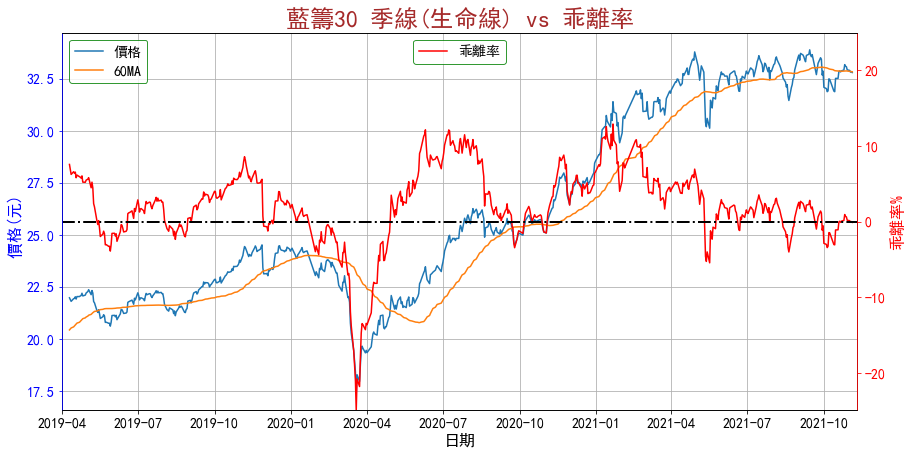

In [18]:
# 我們先製作出第一個subplot，然後把圖表的標題、X軸都設定好，再複製出第二個subplot
fig, ax1 = plt.subplots(figsize=(12,6))     # 我們先製作出第一個subplot
plt.tight_layout()
plt.rcParams['font.size'] = '14'           # Set general font size
plt.title('藍籌30 季線(生命線) vs 乖離率', color='brown', fontsize=24)   # 圖表的標題
plt.xlabel('日期', fontsize=16)
ax2 = ax1.twinx()
# 現在來設定第一個subplot，給定顏色、Y軸等等的
ax1.set_ylabel('價格(元) ', color='blue', fontsize=16)
line1=ax1.plot(df5[['收盤價','%d日均線' % MA]])
ax1.set_xlim(pd.to_datetime(["2019-04-01","2021-11-10"],format='%Y-%m-%d'))
ax1.tick_params(axis='y',labelcolor='blue')
ax1.legend(['價格','%dMA' % MA],edgecolor='green', fontsize=14)
ax1.grid()
# 換第二個subplot
ax2.set_ylabel('乖離率%', color='red', fontsize=16)
line2=ax2.plot(df5['乖離率']*100, color='red',label='乖離率')
ax2.tick_params(axis='y',labelcolor='red')
ax2.legend(loc ="upper center",edgecolor='green', fontsize=14)
ax2.set_ylim(df5['乖離率'].min()*100,abs(df5['乖離率'].min())*100)  #設定y座標值範圍
ax2.axhline(y=0, color='black', linewidth=2, linestyle='-.')  #加上乖離率的0軸水平線
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
ax1.tick_params(axis='y',colors='b')
ax2.tick_params(axis='y',colors="r");

In [19]:
businessdate=pd.date_range('2019-04-10', '2021-09-09', freq='B')
businessdate

DatetimeIndex(['2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
               '2019-04-22', '2019-04-23',
               ...
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09'],
              dtype='datetime64[ns]', length=632, freq='B')

In [20]:
# 設定圖表主題
cf.set_config_file(theme='pearl')

df5['乖離率%'] = df5['乖離率']*100
# 使用iplot繪製圖表
fig = df5[['收盤價', '60日均線','乖離率%']].iplot(kind='lines', secondary_y='乖離率%', asFigure=True)

# 設定圖表標題和軸標籤
fig.layout.title = {'text': '季線(生命線) vs 乖離率', 'font': {'size': 20, 'color': 'brown'}}
fig.layout.xaxis.title =  {'text': '日期', 'font': {'size': 16, 'color': 'blue'}}
fig.layout.yaxis.title = {'text': '價格(元)', 'font': {'size': 14, 'color': 'orange'}}
fig.layout.yaxis2.title = {'text': '乖離率%', 'font': {'size': 14, 'color': 'red'}}

# 設定第二個Y軸的顏色和位置
fig.data[2].line.color = 'red'
fig.layout.yaxis2.showgrid = False
fig.layout.yaxis2.overlaying = 'y'
fig.layout.yaxis2.side = 'right'

fig.update_layout(hovermode='x unified',width=900, height=400,
                  legend=dict(x=0, y=1, bgcolor='white', bordercolor='blue', borderwidth=2, 
                              orientation='h', yanchor='bottom', xanchor='left'))
# 顯示圖表
fig.show()


In [21]:
# 繪製價格線和MA線
trace1 = go.Scatter(x=df5.index, y=df5['收盤價'], mode='lines', name='價格',line=dict(color='orange'))
trace2 = go.Scatter(x=df5.index, y=df5['60日均線'], mode='lines', name='%dMA' % MA,line=dict(color='green'))

# 繪製乖離率線
trace3 = go.Scatter(x=df5.index, y=df5['乖離率']*100, mode='lines', name='乖離率',line=dict(color='red'), yaxis='y2')

# 設定圖表主題和樣式
layout = go.Layout(title='季線(生命線) vs 乖離率',titlefont=dict(size=24, color='brown'),
                   xaxis=dict(title='日期', titlefont=dict(size=16, color='blue')),
                   yaxis=dict(title='價格(元)',titlefont=dict(size=16, color='orange')),
                   yaxis2=dict(title='乖離率%',titlefont=dict(size=16, color='red'), overlaying='y', side='right'),
                   template='ggplot2' # 使用ggplot2樣式
                  )
# 將所有軌跡加入到一個列表中
data = [trace1, trace2, trace3]

# 繪製圖表
fig = go.Figure(data=data, layout=layout)
fig.update_layout(hovermode='x unified',
                  legend=dict(x=0, y=1, bgcolor='white', bordercolor='blue', borderwidth=2, 
                              orientation='h', yanchor='top', xanchor='left'))
# 顯示圖表
fig.show()